In [1]:
%config InlineBackend.figure_format = "retina"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid',  {"grid.color": '.95'})
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
poe5csv = 'http://principlesofeconometrics.com/poe5/data/csv/'
food = pd.read_csv(poe5csv+'food.csv')

res = smf.ols(formula='food_exp ~ income',data=food).fit()

yhat = res.params.Intercept + res.params.income * 20  
print(f"Predicted food_exp for income=$2000: ${yhat:.2f}")

Predicted food_exp for income=$2000: $287.61


In [3]:
new_data = pd.DataFrame({'income':[20]})
pred_res = res.get_prediction(exog=new_data)
yhat0 = pred_res.predicted_mean[0]
se_obs = pred_res.se_obs[0]
print(f"Predicted food_exp for income=$2000: ${yhat0:.2f} +- ${se_obs:.2f}")

Predicted food_exp for income=$2000: $287.61 +- $90.63


In [4]:
tc = st.t.ppf(0.975,res.df_resid)  
print(f"t-critical value (97.5 percentile) = {tc:.4f}")

lb = yhat0 - tc*se_obs
ub = yhat0 + tc*se_obs

print(f"The 95% prediction interval centered at {yhat0:.4f}"\
      +f" is ({lb:.4f}, {ub:.4f})")

t-critical value (97.5 percentile) = 2.0244
The 95% prediction interval centered at 287.6089 is (104.1323, 471.0854)


In [5]:
print(f"R-squared = {res.rsquared:.3f}")    

R-squared = 0.385


In [6]:
table = sm.stats.anova_lm(res) 
print(table)

            df         sum_sq        mean_sq          F    PR(>F)
income     1.0  190626.984483  190626.984483  23.788842  0.000019
Residual  38.0  304505.175827    8013.294101        NaN       NaN


In [7]:
print(food.corr())

          food_exp    income
food_exp  1.000000  0.620485
income    0.620485  1.000000


In [8]:
food['inc_dollar'] = food.income*100

res = smf.ols(formula='food_exp ~ income',data=food).fit()
resd = smf.ols(formula='food_exp ~ inc_dollar',data=food).fit()

print(res.t_test('income,Intercept'))
print(resd.t_test('inc_dollar,Intercept'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      4.877      0.000       5.972      14.447
c1            83.4160     43.410      1.922      0.062      -4.463     171.295
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1021      0.021      4.877      0.000       0.060       0.144
c1            83.4160     43.410      1.922      0.062      -4.463     171.295


In [9]:
from pystout import pystout

pystout(models=[res,resd],
        file='Table4.3.tex',
        digits=3,
        modstat={'nobs':'N','rsquared':'R\\sym{2}',\
                 'rsquared_adj':'Adj. R\\sym{2}'},
        stars={.05:'*',0.01:"**",0.001:'***'},
        addnotes=['Standard errors in parentheses',
                  '* $p<0.05$, ** $p<0.01$, *** $p<0.001$'])

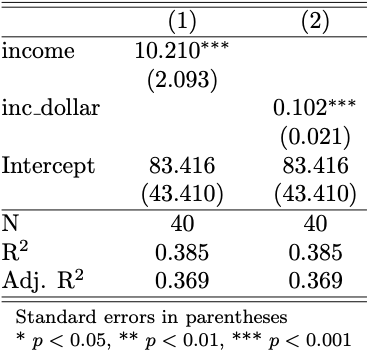

In [10]:
food['lincome'] = np.log(food.income)

res_log = smf.ols(formula='food_exp ~ lincome',data=food).fit()

print(res_log.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -97.1864     84.237     -1.154      0.256    -267.716      73.343
lincome      132.1658     28.805      4.588      0.000      73.854     190.478


In [11]:
print(f"food.income.mean() = {food.income.mean()}")
hypothesis = 'lincome/19.60475'
print(res_log.t_test(hypothesis))

food.income.mean() = 19.60475
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             6.7415      1.469      4.588      0.000       3.767       9.716


In [12]:
hypothesis = 'lincome/10'
print(res_log.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            13.2166      2.880      4.588      0.000       7.385      19.048


In [13]:
hypothesis = 'lincome/20'
print(res_log.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             6.6083      1.440      4.588      0.000       3.693       9.524


In [14]:
hypothesis = 'lincome/30'
print(res_log.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.4055      0.960      4.588      0.000       2.462       6.349


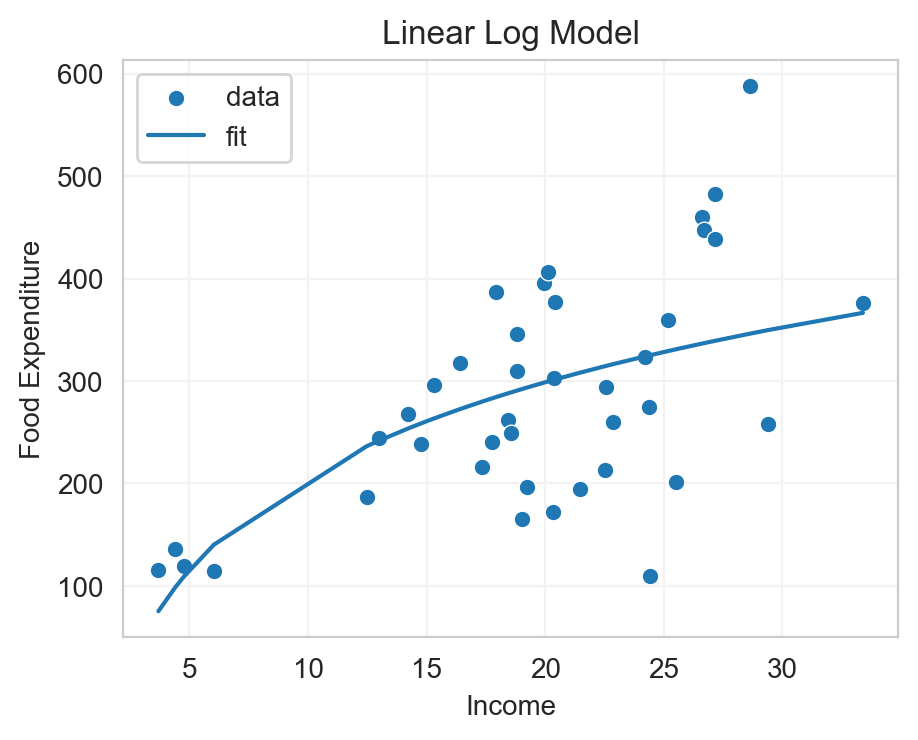

In [15]:
ax = sns.scatterplot(x=food.income,y=food.food_exp,label='data')
ax.plot(food.income,res_log.predict(),label='fit')
ax.set_xlabel("Income")
ax.set_ylabel("Food Expenditure")
ax.set_title("Linear Log Model")
plt.legend(loc=2);

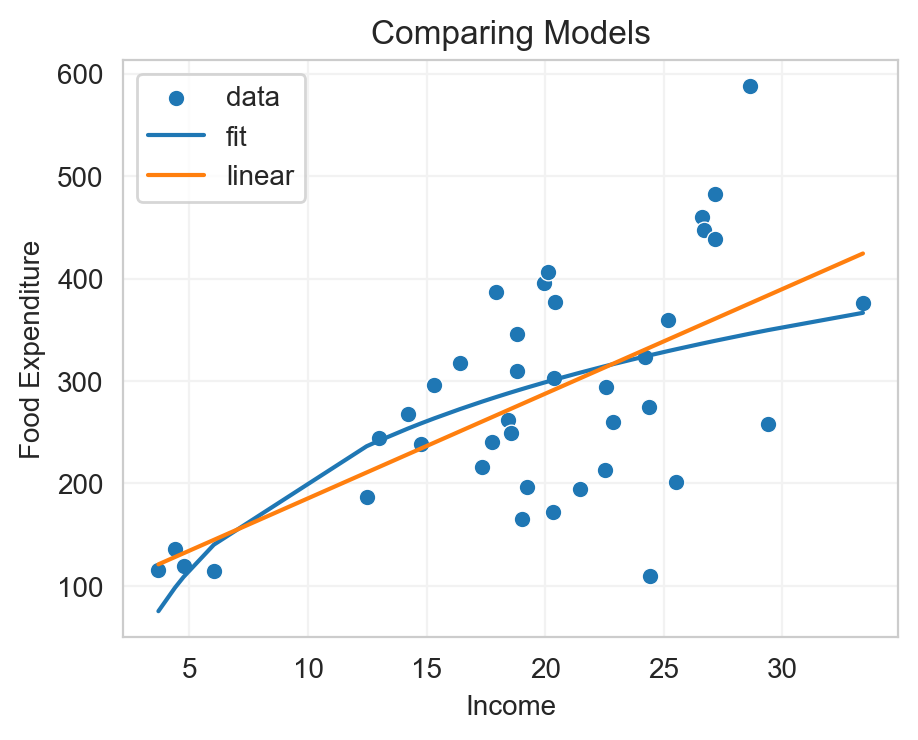

In [16]:
ax = sns.scatterplot(x=food.income,y=food.food_exp,label='data')
ax.plot(food.income,res_log.predict(),label='fit')
ax.plot(food.income,res.predict(),label='linear')
ax.set_xlabel("Income")
ax.set_ylabel("Food Expenditure")
ax.set_title("Comparing Models")
ax.legend();

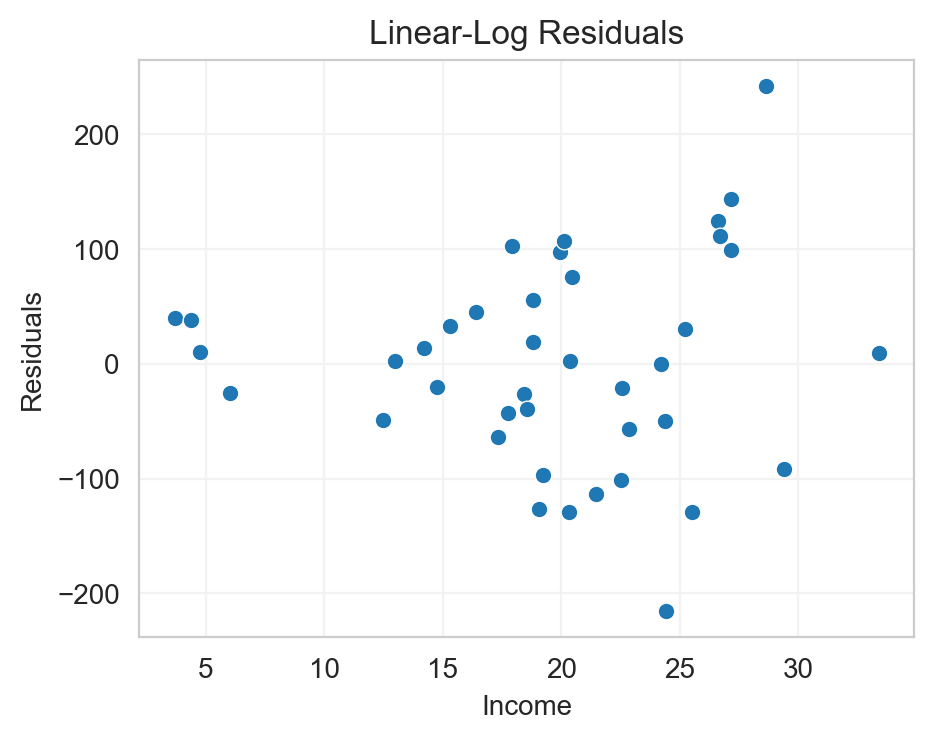

In [17]:
ax = sns.scatterplot(x=food.income,y=res_log.resid)
ax.set_xlabel('Income')
ax.set_ylabel('Residuals')
ax.set_title('Linear-Log Residuals');

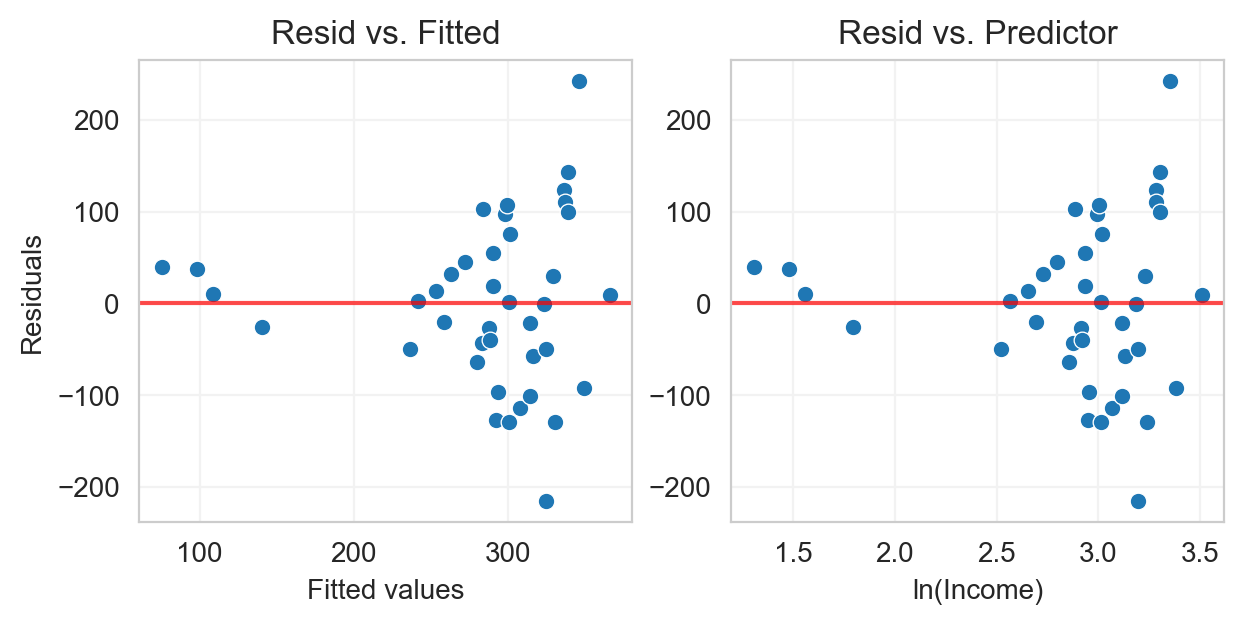

In [18]:
fig, ax = plt.subplots(1,2,figsize=(7,3))

sns.scatterplot(x=res_log.predict(),y=res_log.resid,ax=ax[0])
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Resid vs. Fitted')
ax[0].axhline(c='r',alpha=0.7)

sns.scatterplot(x=food.lincome,y=res_log.resid,ax=ax[1])
ax[1].set_xlabel('ln(Income)')
ax[1].set_ylabel('')
ax[1].set_title('Resid vs. Predictor')
ax[1].axhline(c='r',alpha=0.7); 

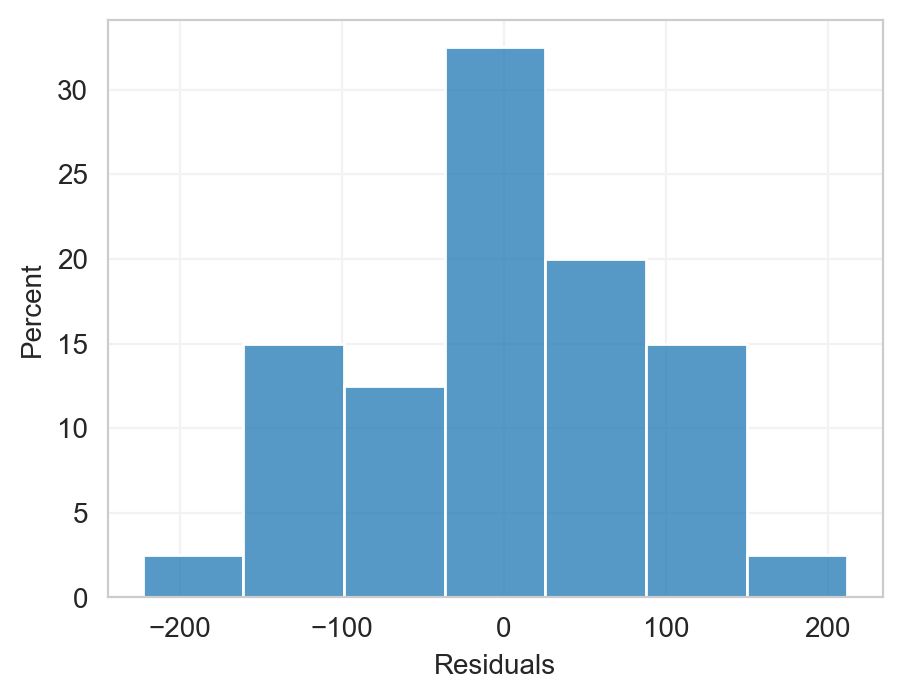

In [19]:
ax = sns.histplot(res.resid,stat='percent')
ax.set_xlabel('Residuals');

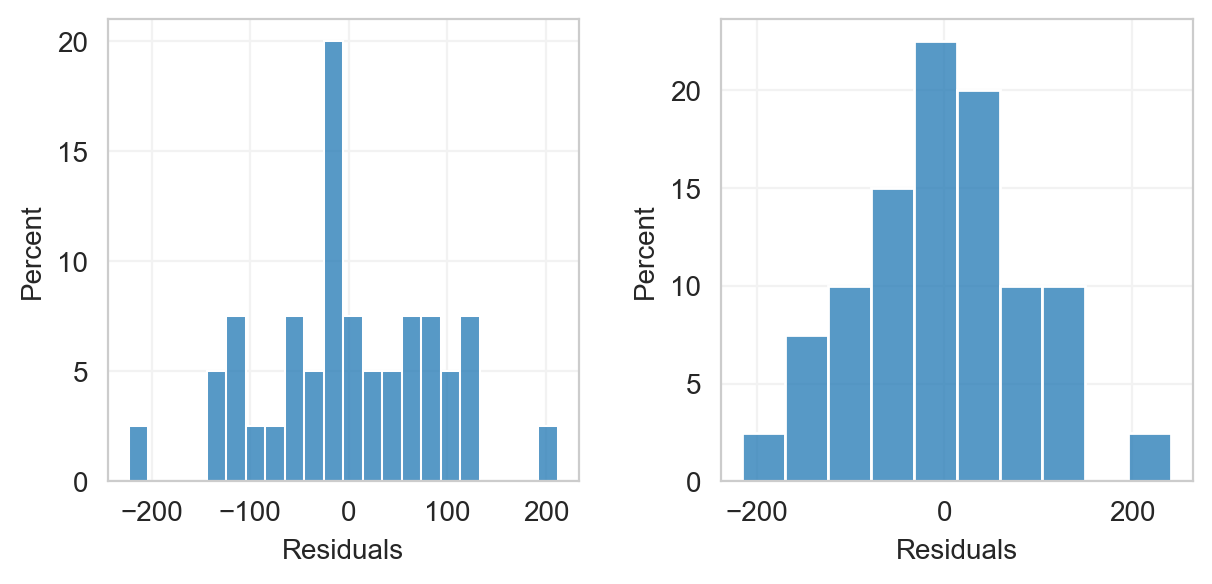

In [20]:
fig, ax = plt.subplots(1,2,figsize=(7,3))

sns.histplot(res.resid,binwidth=20,stat='percent',ax=ax[0])
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Percent')

sns.histplot(res_log.resid,bins=10,stat='percent',ax=ax[1])
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Percent')
plt.subplots_adjust(wspace=0.3)  # Add white space between plots

In [21]:
S = st.skew(res.resid)
K = st.kurtosis(res.resid,fisher=False)
JB = (res.nobs/6) * (S**2 + (K-3)**2/4)

print(f"Skewness:     {S:.4f}")
print(f"Kurtosis:     {K:.4f}")
print(f"JB statistic: {JB:.4f}")

Skewness:     -0.0973
Kurtosis:     2.9890
JB statistic: 0.0633


In [22]:
from statsmodels.stats.stattools import jarque_bera

jb, jbpv, skew, kurt = jarque_bera(res.resid)

print(f"Jarque-Bera Statistic = {jb:.4f}")
print(f"Jarque-Bera p-value   = {jbpv:.4f}")
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")

Jarque-Bera Statistic = 0.0633
Jarque-Bera p-value   = 0.9688
Skewness: -0.0973
Kurtosis: 2.9890


In [23]:
print(f"Chi-squre(2) 95th percentile: {st.chi2.ppf(0.95, 2):.2f}")

Chi-squre(2) 95th percentile: 5.99


In [24]:
from statsmodels.stats.stattools import omni_normtest

omni, omnipv = omni_normtest(res.resid)

print(f"alternative normality test statistic= {omni:.5f}")
print(f"alternative normality p-value = {omnipv:.5f}")

alternative normality test statistic= 0.27739
alternative normality p-value = 0.87049


In [25]:
omni, omnipv = st.normaltest(res.resid)

print(f"alternative normality test statistic= {omni:.5f}")
print(f"alternative normality p-value = {omnipv:.5f}")

alternative normality test statistic= 0.27739
alternative normality p-value = 0.87049


In [26]:
# Renumber index to match POE5 (first entry now has index 1, not 0)
food.index += 1
#create instance of influence
influence = res.get_influence()
#leverage (hat values)
food['leverage'] = influence.hat_matrix_diag
print(f"Mean leverage = {food.leverage.mean():.2f}")

Mean leverage = 0.05


In [27]:
high_leverage = food.leverage>2*food.leverage.mean()
print(food[['leverage','income']][high_leverage])

    leverage  income
1   0.163496    3.69
2   0.151580    4.39
3   0.145661    4.75
4   0.125763    6.03
40  0.129063   33.40


In [28]:
food['ehatstu'] = influence.resid_studentized_external
print(food[['ehatstu','food_exp','income']][abs(food.ehatstu)>2])

     ehatstu  food_exp  income
31 -2.750375    109.71   24.42
38  2.641657    587.66   28.62


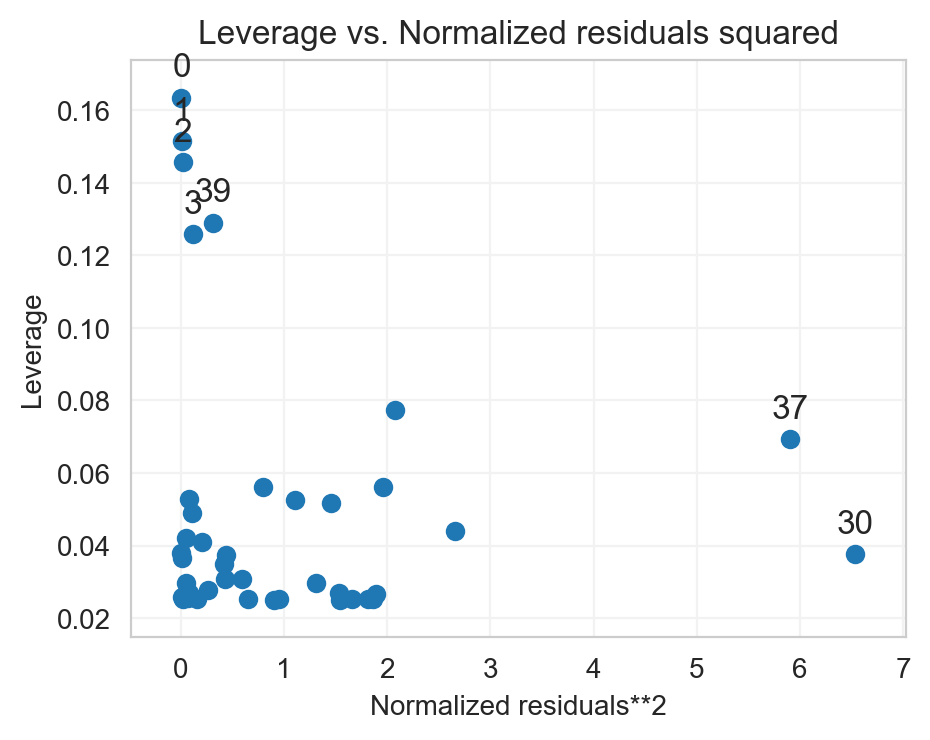

In [29]:
sm.graphics.plot_leverage_resid2(res)
plt.show()

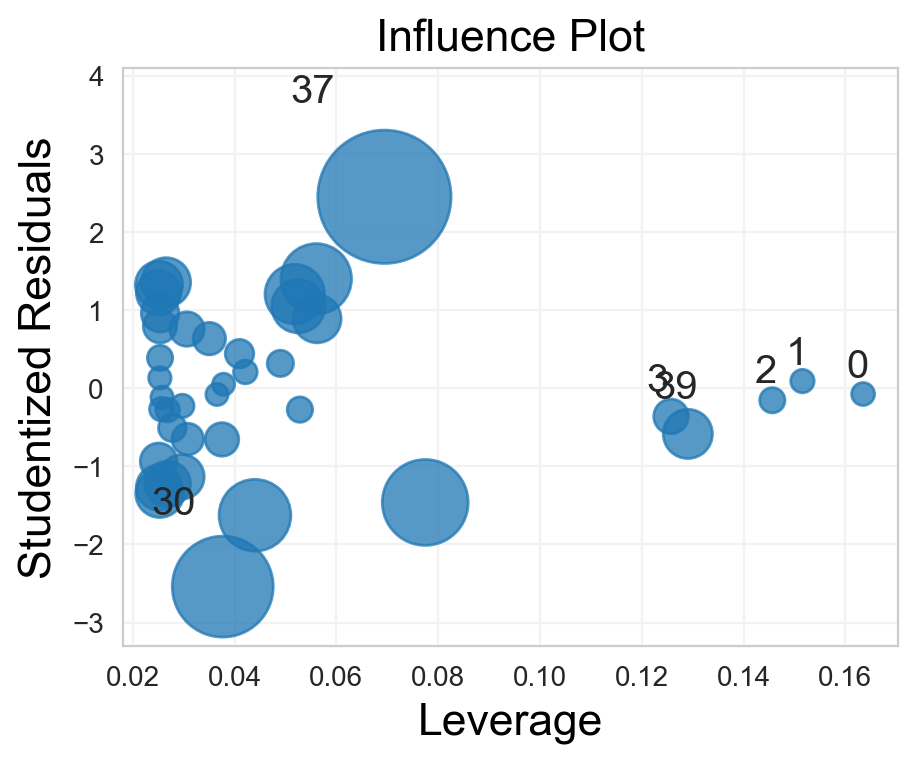

In [30]:
influence.plot_influence()
plt.ylim([-3.3,4.1]);

In [31]:
food['dfbetas'] = influence.dfbetas[:,1]
dfb_thresh = 2/np.sqrt(res.nobs)
print(food[['dfbetas','food_exp','income']][abs(food.dfbetas)>dfb_thresh])

     dfbetas  food_exp  income
38  0.577299    587.66   28.62
39 -0.353918    257.95   29.40


In [32]:
food['dfits'] = influence.dffits[0]
food['yhat'] = res.predict()
dfits_thresh = 2*np.sqrt((res.df_model+1)/res.nobs)
print(f"dfits threshold = {dfits_thresh:.5f}\n")
print(food[['dfits','yhat','food_exp','income']][abs(food.dfits)>dfits_thresh])

dfits threshold = 0.44721

       dfits        yhat  food_exp  income
31 -0.544227  332.735483    109.71   24.42
38  0.721631  375.615984    587.66   28.62


In [33]:
wheat = pd.read_csv(poe5csv+'wa_wheat.csv')
print(wheat.describe())

       northampton    chapman    mullewa  greenough   time
count    48.000000  48.000000  48.000000  48.000000  48.00
mean      1.168654   1.072385   0.984063   1.153060  24.50
std       0.425032   0.332807   0.335285   0.365387  14.00
min       0.302400   0.416700   0.396500   0.436900   1.00
25%       0.912375   0.858625   0.787050   0.914100  12.75
50%       1.041900   1.013300   0.970550   1.095500  24.50
75%       1.302350   1.220275   1.192775   1.328500  36.25
max       2.316100   2.024400   1.799200   2.235300  48.00


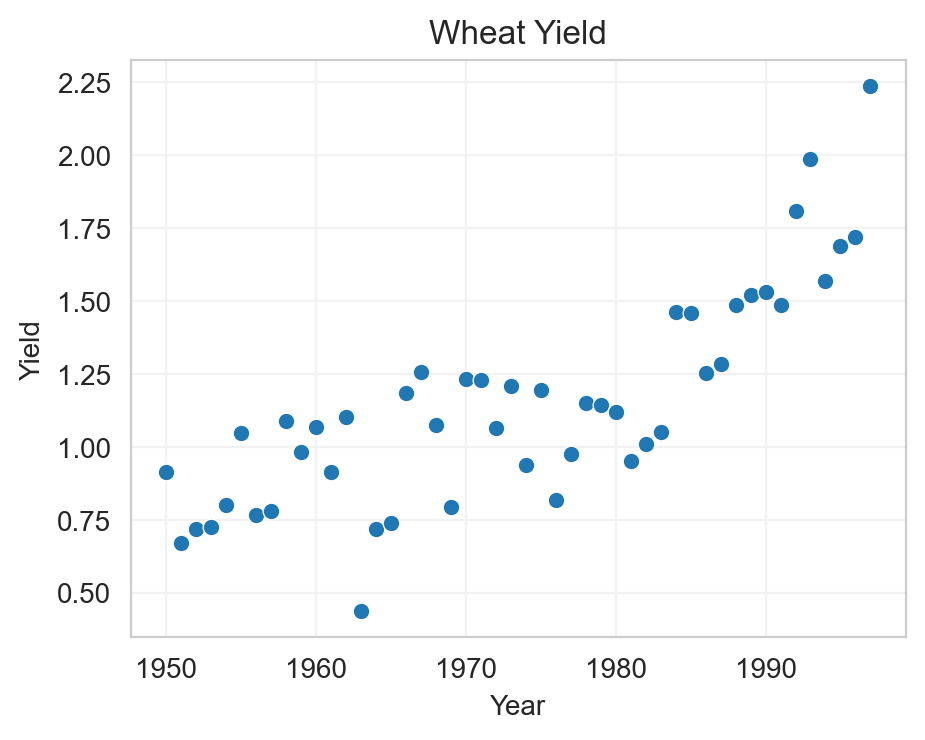

In [34]:
wheat['wyield'] = wheat.greenough
wheat['year'] = wheat.time + 1949

ax = sns.scatterplot(x=wheat.year,y=wheat.wyield)
ax.set_xlabel("Year")
ax.set_ylabel("Yield")
ax.set_title("Wheat Yield");

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6378      0.064      9.945      0.000       0.509       0.767
time           0.0210      0.002      9.230      0.000       0.016       0.026


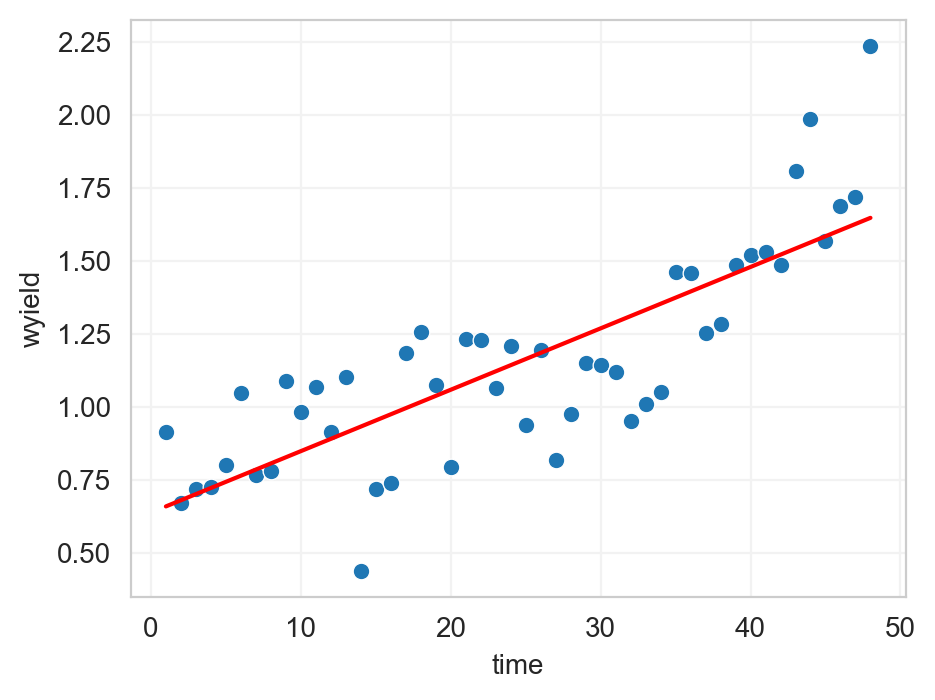

In [35]:
res = smf.ols(formula='wyield ~ time',data=wheat).fit()
print(res.summary().tables[1])
ax = sns.scatterplot(x=wheat.time,y=wheat.wyield)
plt.plot(wheat.time,res.predict(),color='r');

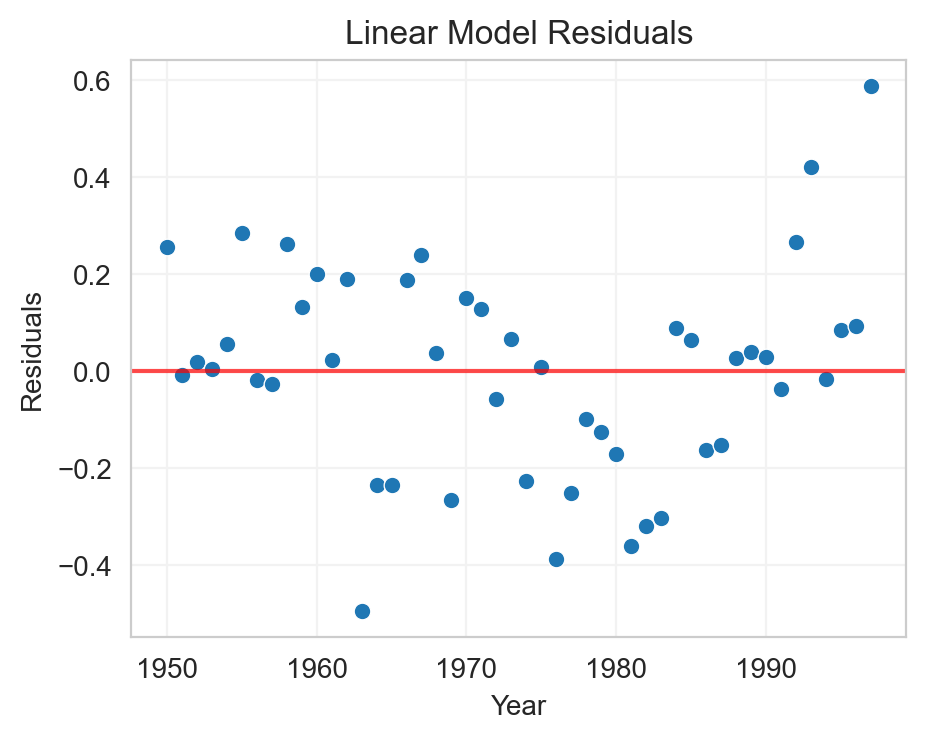

In [36]:
ax = sns.scatterplot(x=wheat.year,y=res.resid)
ax.set_xlabel("Year")
ax.set_ylabel("Residuals")
ax.set_title("Linear Model Residuals")
ax.axhline(c='r',alpha=0.7);

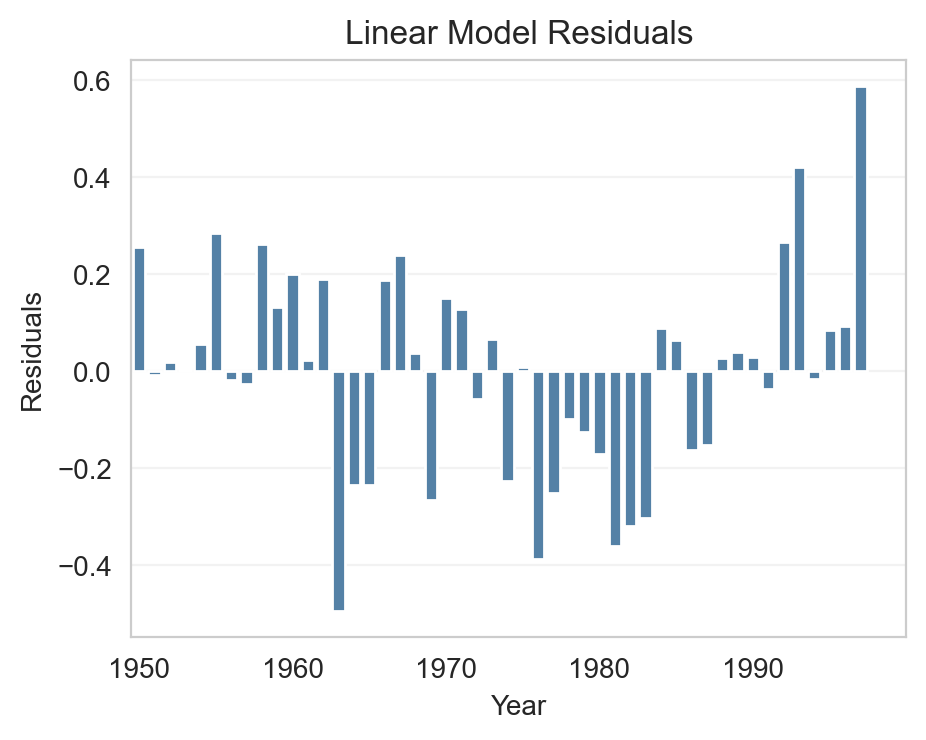

In [37]:
ax = sns.barplot(x=wheat.year,y=res.resid,color='steelblue')
ax.set_xlabel("Year")
ax.set_ylabel("Residuals")
ax.set_title("Linear Model Residuals")
ax.set_xticks(np.arange(0,51,10));

In [38]:
wheat['time3'] = (wheat.time/100)**3
res3 = smf.ols(formula='wyield ~ time3',data=wheat).fit()
print(res3.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8741      0.036     24.533      0.000       0.802       0.946
time3          9.6815      0.822     11.773      0.000       8.026      11.337


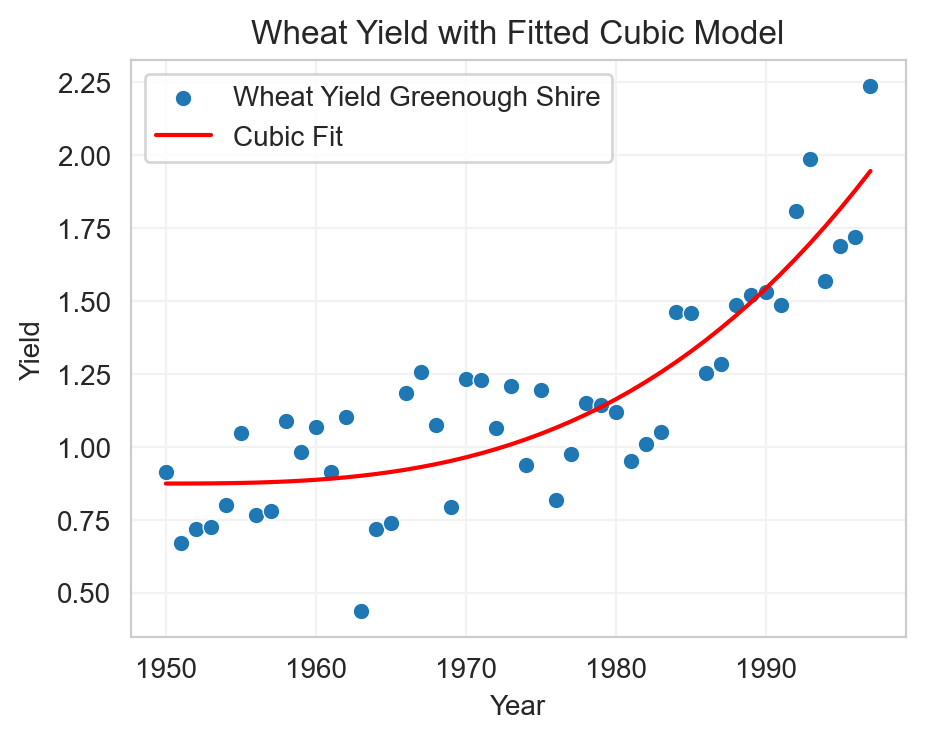

In [39]:
ax = sns.scatterplot(x=wheat.year,y=wheat.wyield,
                     label='Wheat Yield Greenough Shire')
ax.set_xlabel("Year")
ax.set_ylabel("Yield")
ax.set_title("Wheat Yield with Fitted Cubic Model")
ax.plot(wheat['year'],res3.predict(),label='Cubic Fit',c='r')
plt.legend();

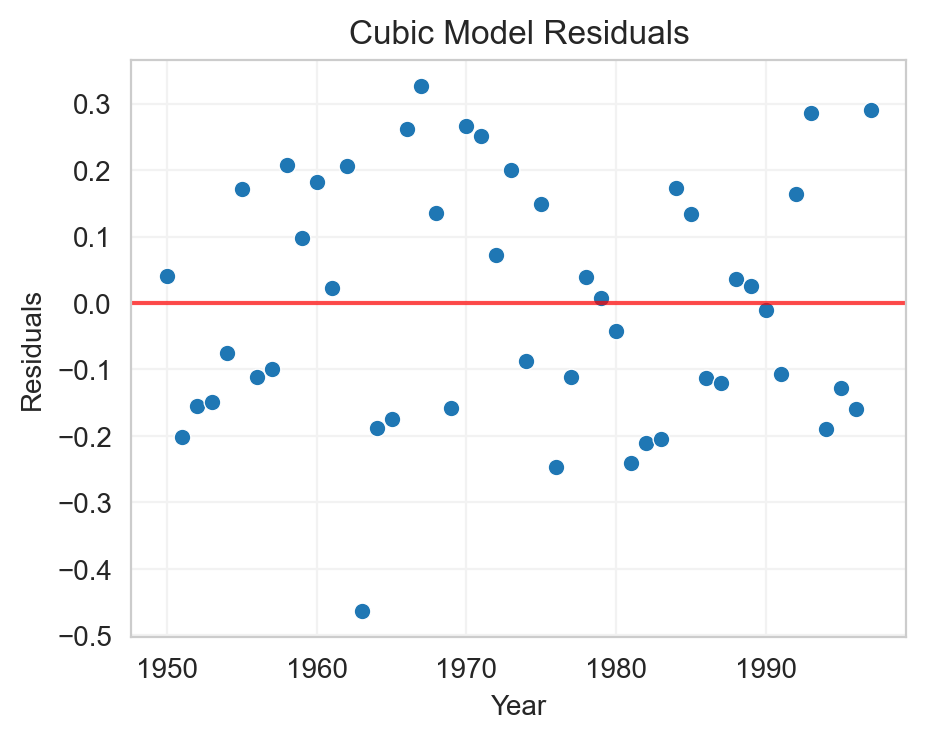

In [40]:
ax = sns.scatterplot(x=wheat.year,y=res3.resid)
ax.set_xlabel("Year")
ax.set_ylabel("Residuals")
ax.set_title("Cubic Model Residuals")
ax.axhline(c='r',alpha=0.7);

In [41]:
wheat['lyield'] = np.log(wheat.wyield)
res_log = smf.ols(formula='lyield ~ time',data=wheat).fit()
print(res_log.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3434      0.058     -5.879      0.000      -0.461      -0.226
time           0.0178      0.002      8.599      0.000       0.014       0.022


In [42]:
res_log = smf.ols(formula='lyield ~ year',data=wheat).fit()
print(res_log.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.1211      4.095     -8.576      0.000     -43.364     -26.878
year           0.0178      0.002      8.599      0.000       0.014       0.022


In [43]:
cps5s = pd.read_csv(poe5csv+'cps5_small.csv').sort_values(by=['educ'])
print(cps5s[['wage','educ']].describe())

              wage         educ
count  1200.000000  1200.000000
mean     23.640042    14.202500
std      15.216554     2.890811
min       3.940000     0.000000
25%      13.000000    12.000000
50%      19.300000    14.000000
75%      29.800000    16.000000
max     221.100000    21.000000


In [44]:
from tabulate import tabulate
df = cps5s['educ'].value_counts().sort_index().to_frame()

df['percent'] = df['count']/sum(df['count'])*100
df['cumsum'] = df.percent.cumsum()
print(tabulate(df,headers='keys',floatfmt=(".0f",".0f",".1f",".1f")))

  educ    count    percent    cumsum
------  -------  ---------  --------
     0        2        0.2       0.2
     3        6        0.5       0.7
     5       14        1.2       1.8
     8       10        0.8       2.7
     9       11        0.9       3.6
    10       10        0.8       4.4
    11       18        1.5       5.9
    12      307       25.6      31.5
    13      201       16.8      48.2
    14      124       10.3      58.6
    16      304       25.3      83.9
    18      149       12.4      96.3
    20       25        2.1      98.4
    21       19        1.6     100.0


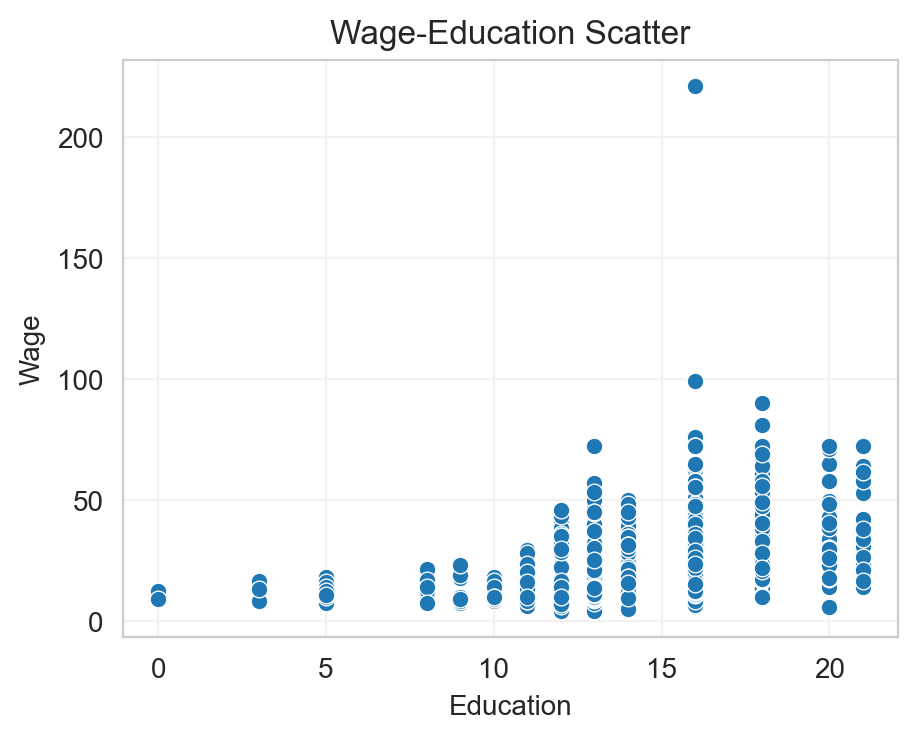

In [45]:
ax = sns.scatterplot(x=cps5s.educ,y=cps5s.wage)
ax.set_xlabel("Education")
ax.set_ylabel("Wage")
ax.set_title("Wage-Education Scatter");

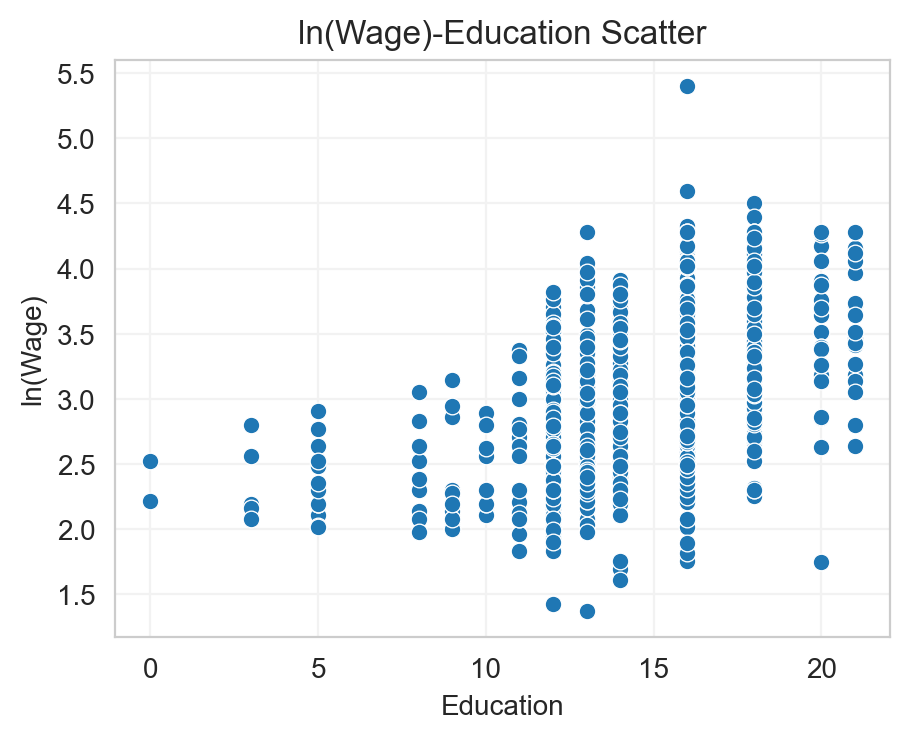

In [46]:
cps5s['lwage'] = np.log(cps5s.wage)
ax = sns.scatterplot(x=cps5s.educ,y=cps5s.lwage)
ax.set_xlabel("Education")
ax.set_ylabel("ln(Wage)")
ax.set_title("ln(Wage)-Education Scatter");

In [47]:
res_cps5s = smf.ols(formula='lwage ~ educ',data=cps5s).fit()
print(res_cps5s.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5968      0.070     22.753      0.000       1.459       1.735
educ           0.0988      0.005     20.394      0.000       0.089       0.108


In [48]:
sig2 = res_cps5s.mse_resid
print(f"sigma-hat squared = {sig2:.6f}")

sigma-hat squared = 0.234932


In [49]:
new_data = pd.DataFrame({'educ':[12]})
pred_res = res_cps5s.get_prediction(exog=new_data)
yhat12 = pred_res.predicted_mean[0]
print(f"Predicted ln(Wage) for educ=12: {yhat12:.2f}")

Predicted ln(Wage) for educ=12: 2.78


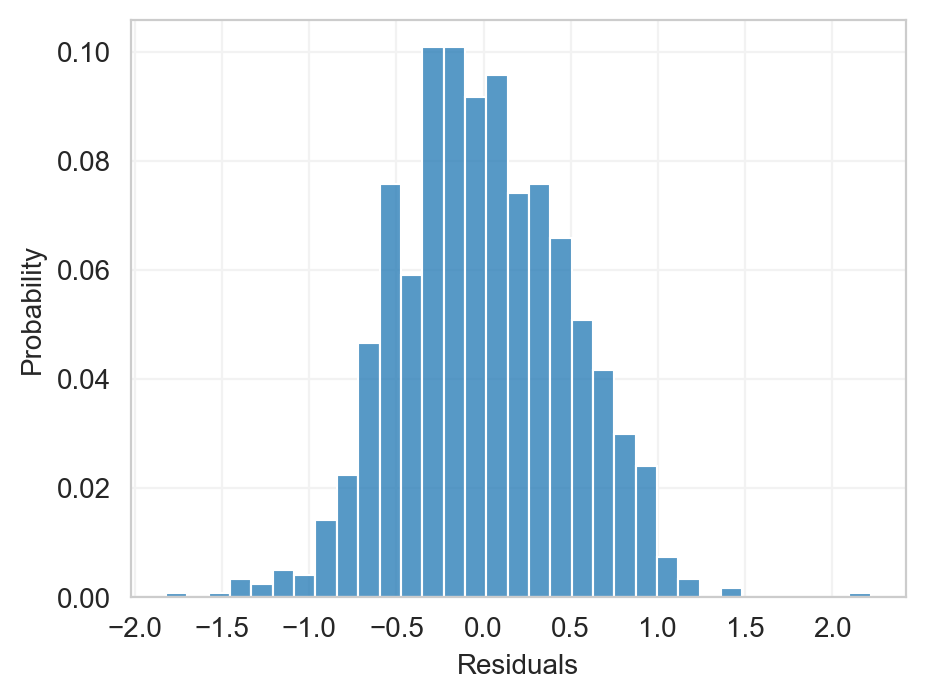

In [50]:
ax = sns.histplot(x=res_cps5s.resid,stat='probability')
ax.set_xlabel("Residuals");

In [51]:
jb, jbpv, skew, kurt = jarque_bera(res_cps5s.resid)
chic = st.chi2.isf(0.05,2) 
print(f"Jarque-Bera Statistic = {jb:.3f}")
print(f"Chi-square(2) 95th percentile = {chic:.6f}")
print(f"Jarque-Bera p-value = {jbpv:.3f}")

Jarque-Bera Statistic = 1.533
Chi-square(2) 95th percentile = 5.991465
Jarque-Bera p-value = 0.465


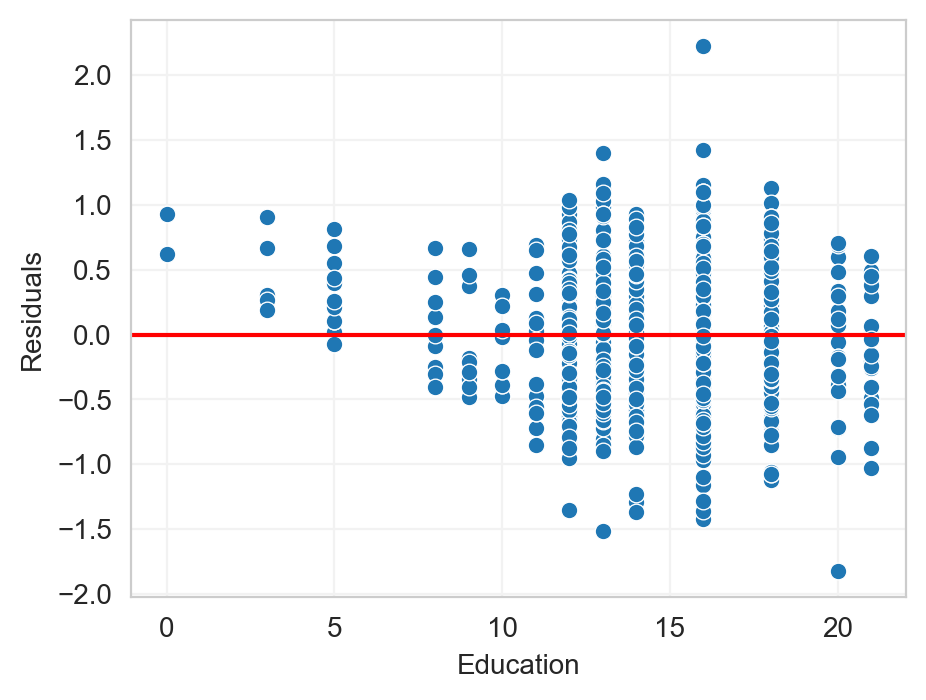

In [52]:
ax = sns.scatterplot(x=cps5s.educ,y=res_cps5s.resid)
ax.set_xlabel("Education")
ax.set_ylabel("Residuals")
ax.axhline(c='r');

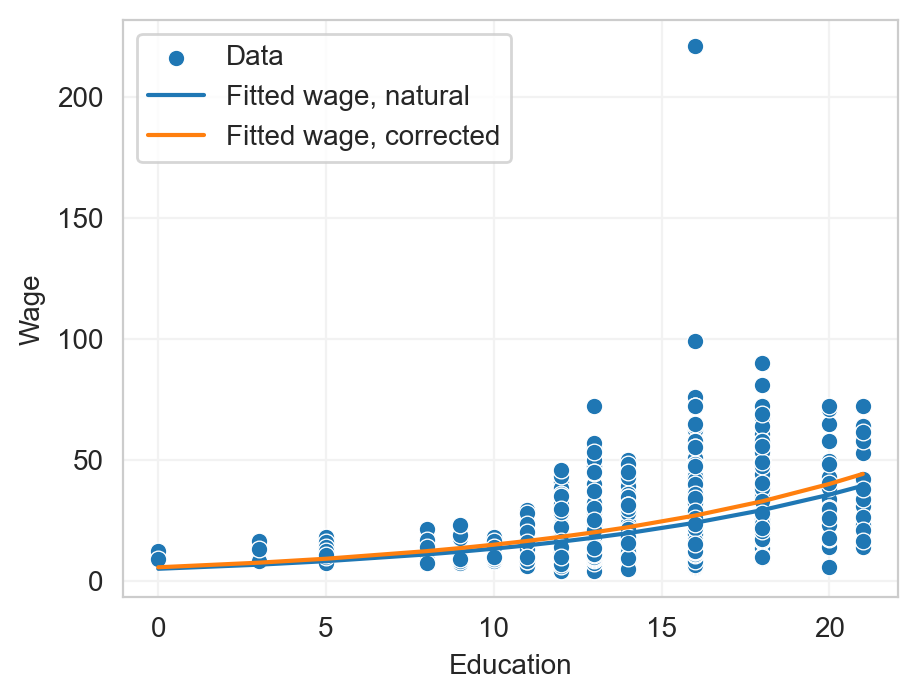

In [53]:
cps5s['yhatn'] = np.exp(res_cps5s.predict())
cps5s['yhatc'] = cps5s.yhatn*np.exp(sig2/2)

ax = sns.scatterplot(x=cps5s.educ,y=cps5s.wage,label='Data')
ax.set_xlabel("Education")
ax.set_ylabel("Wage")
ax.plot(cps5s.educ,cps5s.yhatn,label='Fitted wage, natural')
ax.plot(cps5s.educ,cps5s.yhatc,label='Fitted wage, corrected')
plt.legend();

In [54]:
new_data = pd.DataFrame({'educ':[12]})
pred_res = res_cps5s.get_prediction(exog=new_data)
yhat12n = np.exp(pred_res.predicted_mean[0])
yhat12c = yhat12n*np.exp(sig2/2)

print(f"Natural-log wage estimate for educ=12: {yhat12n:.4f}")
print(f"Corrected wage estimate for educ=12: {yhat12c:.4f}")

Natural-log wage estimate for educ=12: 16.1493
Corrected wage estimate for educ=12: 18.1622


In [55]:
print(cps5s.wage[cps5s.educ==12].describe())

count    307.000000
mean      17.305179
std        7.919782
min        4.170000
25%       11.340000
50%       15.000000
75%       22.075000
max       45.650000
Name: wage, dtype: float64


In [56]:
print(cps5s[['wage','yhatn','yhatc']].corr())

           wage     yhatn     yhatc
wage   1.000000  0.464704  0.464704
yhatn  0.464704  1.000000  1.000000
yhatc  0.464704  1.000000  1.000000


In [57]:
rho, p_rho = st.pearsonr(cps5s.wage,cps5s.yhatn)
      
print(f"Pearson correlation coefficient squared = {rho**2:.6f}")

Pearson correlation coefficient squared = 0.215949


Natural-log wage estimate for educ=12: 2.7819 in range (6.2357,41.8233)


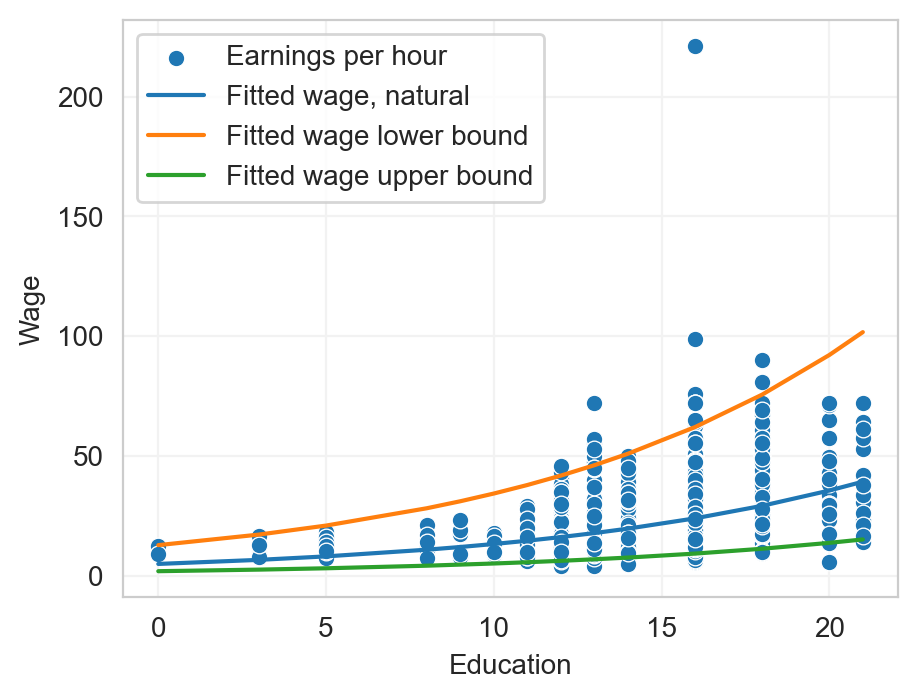

In [58]:
tc = st.t.ppf(0.975,res_cps5s.df_resid)

sef = pred_res.se_obs[0]
lb_wage = np.exp(np.log(cps5s.yhatn) - tc*sef)
ub_wage = np.exp(np.log(cps5s.yhatn) + tc*sef)

ub12 = np.exp(np.log(yhat12n)+tc*sef)
lb12 = np.exp(np.log(yhat12n)-tc*sef)
print(f"Natural-log wage estimate for educ=12: {yhat12:.4f} in range",\
        f"({lb12:.4f},{ub12:.4f})")

ax = sns.scatterplot(x=cps5s.educ,y=cps5s.wage,label='Earnings per hour')
ax.set_xlabel("Education")
ax.set_ylabel("Wage")
ax.plot(cps5s.educ,cps5s.yhatn,label='Fitted wage, natural')
ax.plot(cps5s.educ,ub_wage,label='Fitted wage lower bound')
ax.plot(cps5s.educ,lb_wage,label='Fitted wage upper bound')
plt.legend();

In [59]:
nb = pd.read_csv(poe5csv+'newbroiler.csv').sort_values(by='p')

print(nb[['p','q']].describe())

               p          q
count  52.000000  52.000000
mean    1.451797  31.238462
std     0.548999  11.985746
min     0.933070  14.300000
25%     0.986250  20.975000
50%     1.309525  28.400000
75%     1.633812  39.924999
max     2.883820  53.900002


In [60]:
nb['lq'] = np.log(nb.q)
nb['lp'] = np.log(nb.p)
res_nb = smf.ols(formula='lq ~ lp',data=nb).fit()

print(res_nb.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7169      0.022    166.236      0.000       3.672       3.762
lp            -1.1214      0.049    -22.999      0.000      -1.219      -1.023


In [61]:
sig2 = rmse(nb.lq, res_nb.predict())**2

nb['qhatc'] = np.exp(res_nb.predict())*np.exp(sig2/2)

ax = sns.scatterplot(x=nb.p,y=nb.q,label='per capita consumption, Q')
ax.set_xlabel("Price of Chicken")
ax.set_ylabel("Quantity of Chicken")
ax.plot(nb.p,nb.qhatc,label='predicted Q, corrected')
plt.legend();

NameError: name 'rmse' is not defined

In [ ]:
print(nb[['q','qhatc']].corr())

In [ ]:
rho, p_rho = st.pearsonr(nb.q,nb.qhatc)
      
print(f"Pearson correlation coefficient squared = {rho**2:.6f}")